<a href="https://colab.research.google.com/github/ishujaswani/Stock-Market/blob/Portfolio-Management/Exploratory_data_analysis_on_Motor_company's_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock MArket Analysis Project


In [2]:
pip install plotly

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from plotly import graph_objs as go
import seaborn as sns
import os
%matplotlib inline

____
## Part 1: Getting the Data


In [4]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,10,26)
Tesla = web.DataReader('TSLA','yahoo',start,end)

In [5]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


### Other Car Companies

In [6]:
Ford = web.DataReader('F','yahoo',start,end)
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,6.968545
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.429503
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,7.707428
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,7.904015
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,7.924348


In [7]:
GM = web.DataReader('GM','yahoo',start,end)
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.425232
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.479336
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.340223
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.698719
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.876482


## Part 2: Visualizing the Data

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

Text(0.5, 0, 'Dates')

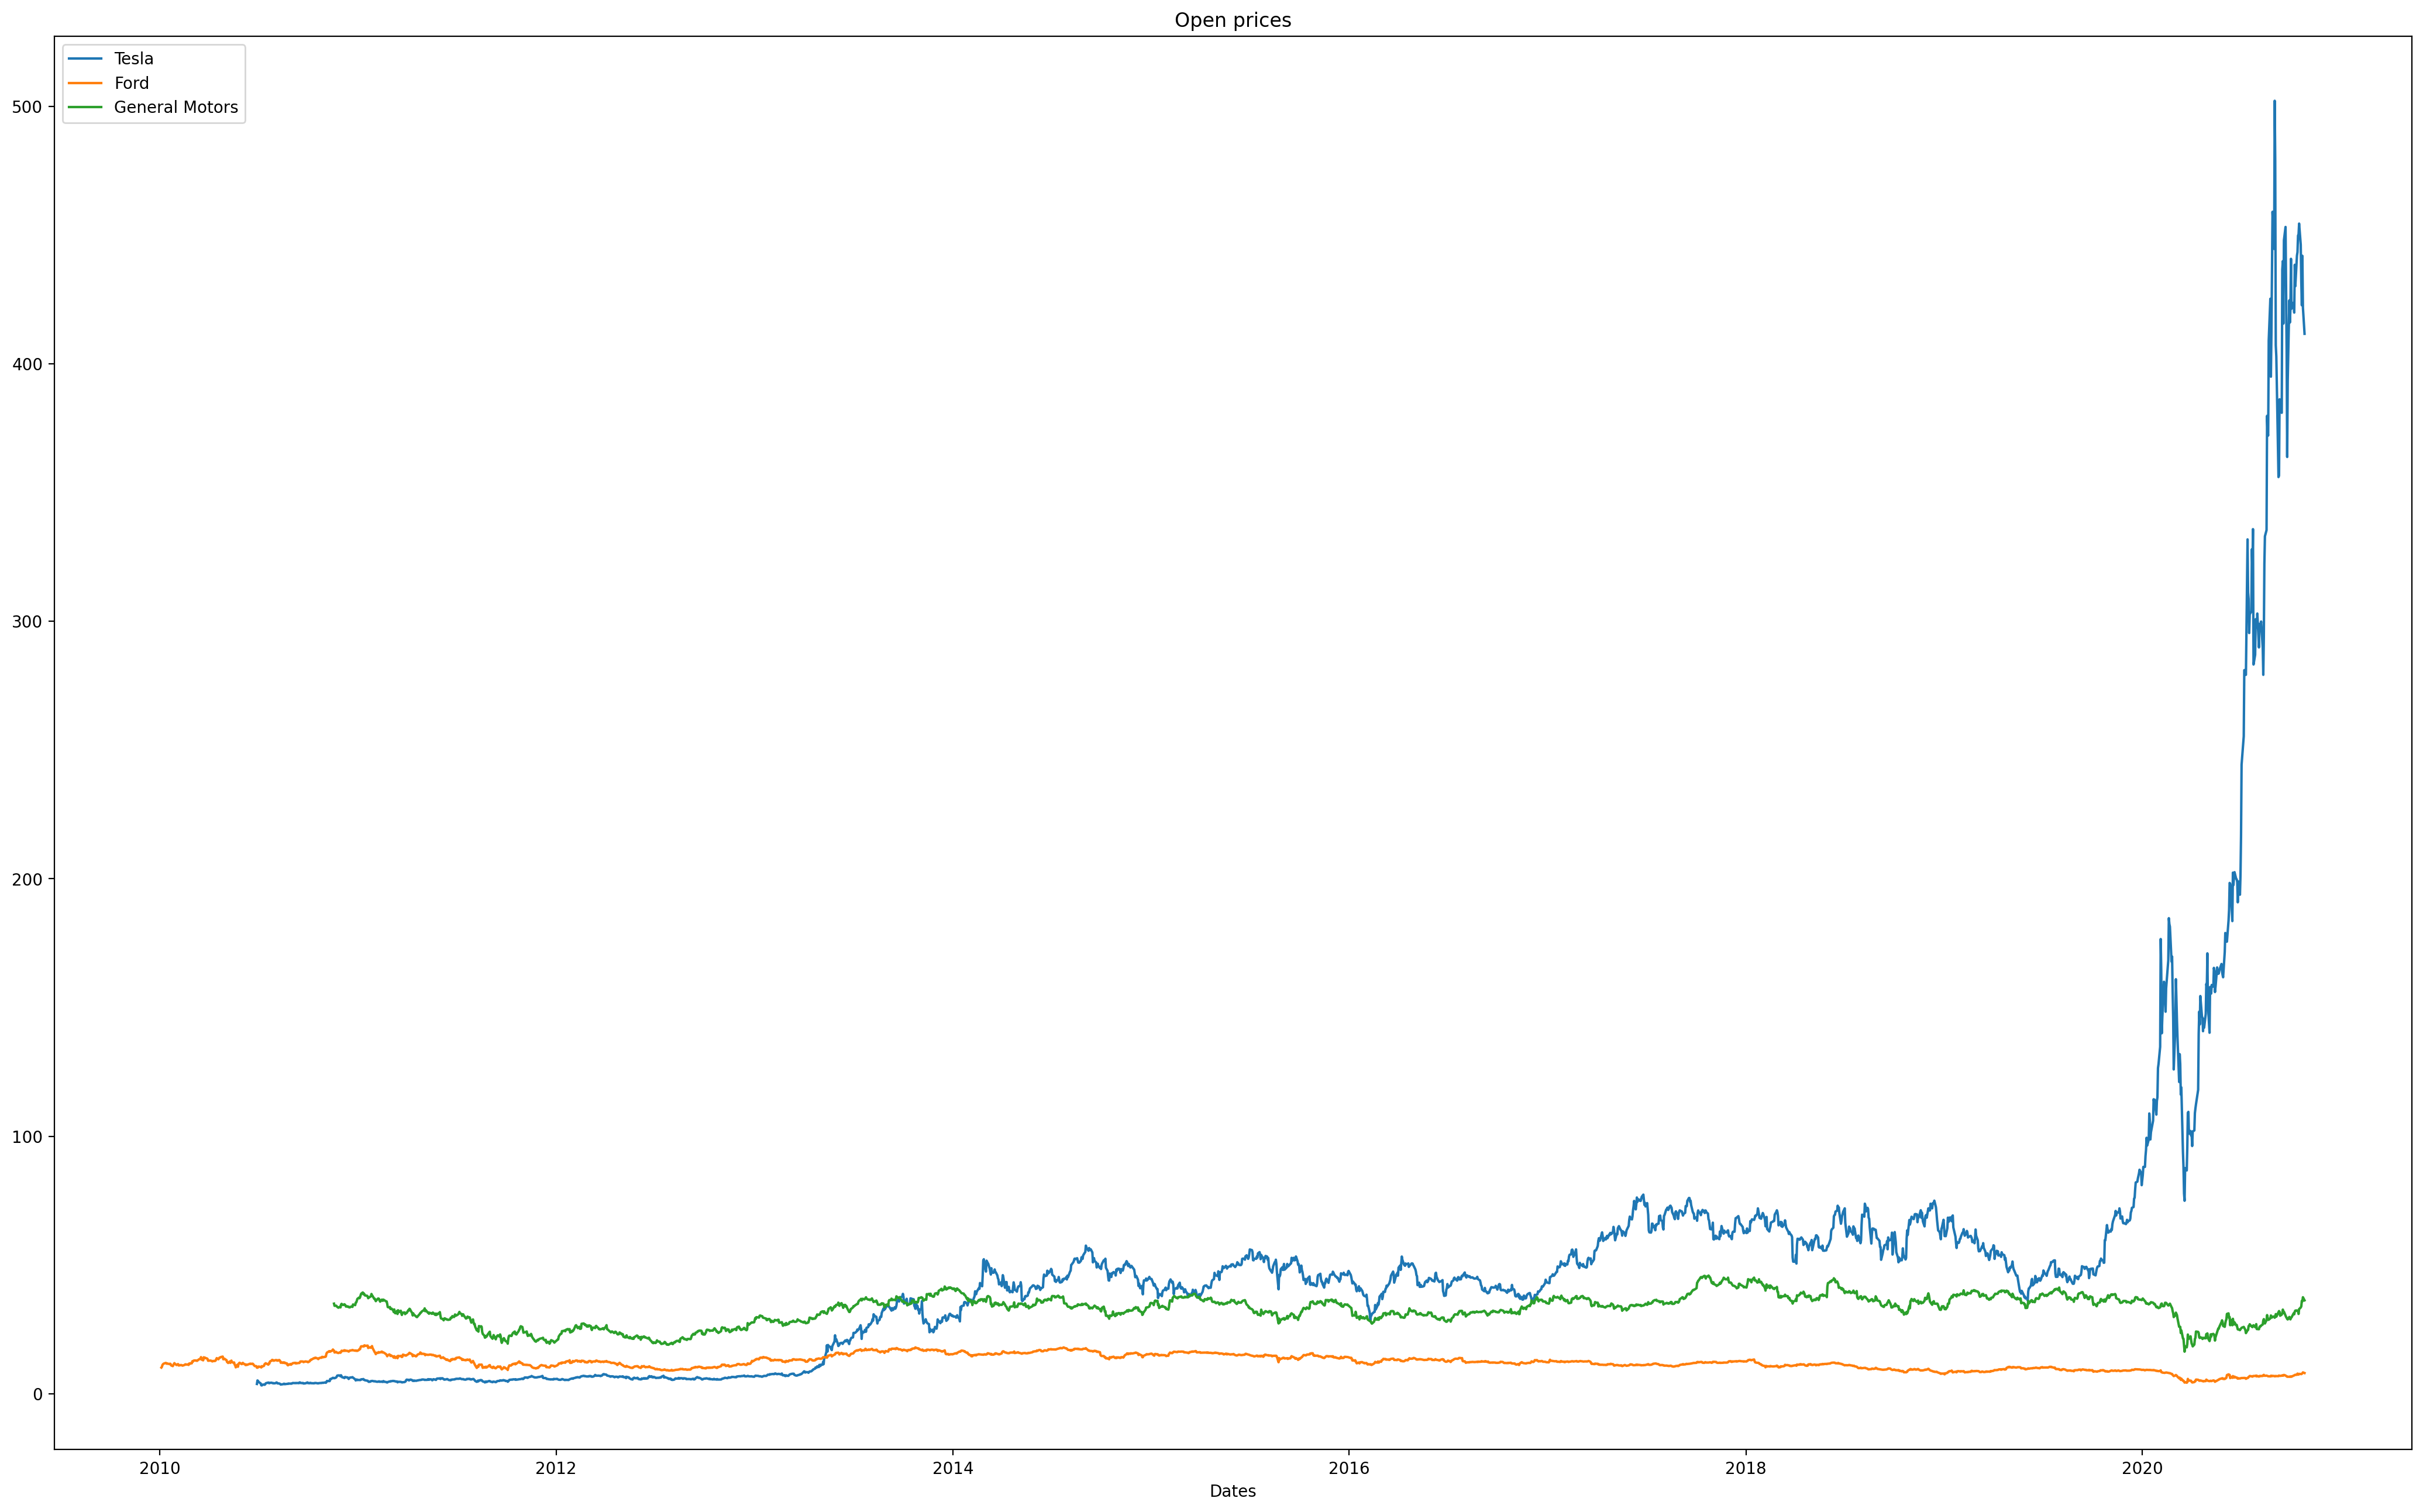

In [8]:
fig,ax = plt.subplots(figsize=(26,16),dpi=200)
ax.plot(Tesla['Open'])
ax.plot(Ford['Open'])
ax.plot(GM['Open'])
ax.legend(['Tesla','Ford','General Motors'],loc=2)
ax.set_title('Open prices')
ax.set_xlabel('Dates')

** Plot the Volume of stock traded each day.**

Text(0.5, 0, 'Dates')

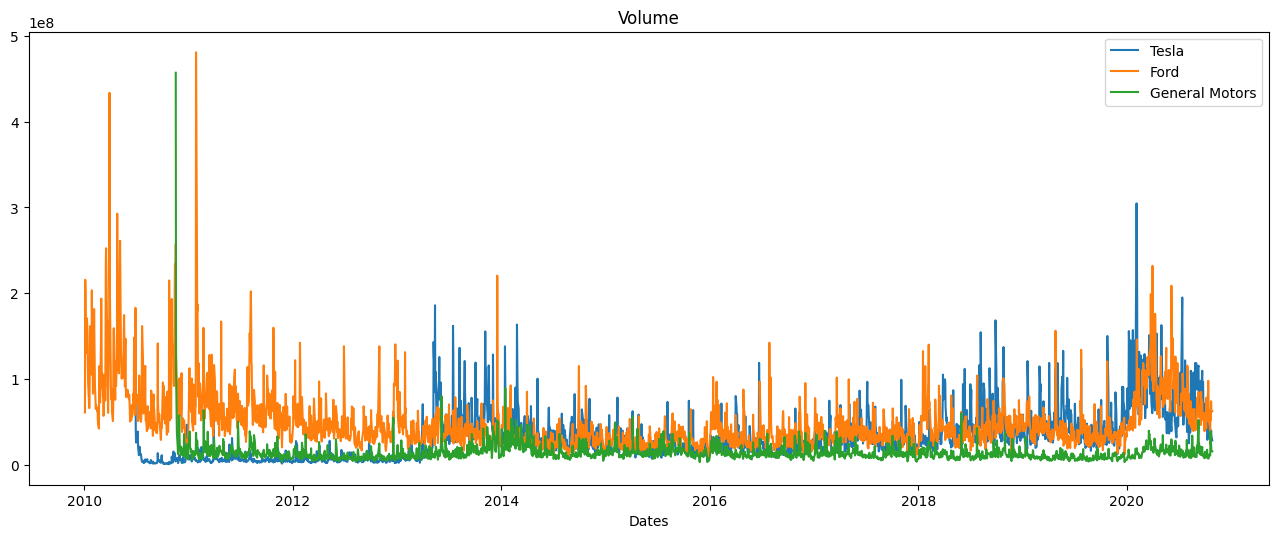

In [9]:
fig,ax = plt.subplots(figsize=(16,6),dpi=100)
ax.plot(Tesla['Volume'])
ax.plot(Ford['Volume'])
ax.plot(GM['Volume'])
ax.legend(['Tesla','Ford','General Motors'],loc='best')
ax.set_title('Volume')
ax.set_xlabel('Dates')

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [10]:
Ford['Volume'].idxmax()

Timestamp('2011-01-28 00:00:00')

____

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [11]:
Tesla['Total Traded'] = Tesla['Open'] * Tesla['Volume']
Ford['Total Traded'] = Ford['Open'] * Ford['Volume']
GM['Total Traded'] = GM['Open'] * GM['Volume']

** Plot this "Total Traded" against the time index.**

Text(0.5, 0, 'Dates')

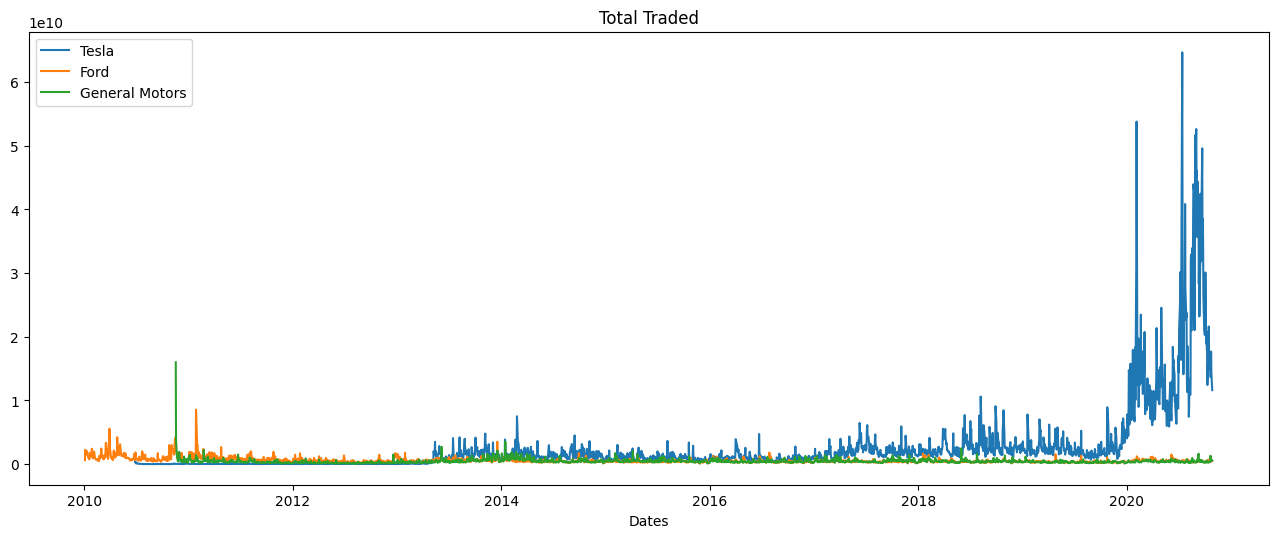

In [12]:
fig,ax = plt.subplots(figsize=(16,6),dpi=100)
ax.plot(Tesla['Total Traded'])
ax.plot(Ford['Total Traded'])
ax.plot(GM['Total Traded'])
ax.legend(['Tesla','Ford','General Motors'],loc='best')
ax.set_title('Total Traded')
ax.set_xlabel('Dates')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [13]:
Tesla['Total Traded'].idxmax()

Timestamp('2020-07-13 00:00:00')

# BOLINGER BANDS FOR TESLA

In [14]:
Tesla['Open 20 day MA'] = Tesla['Open'].rolling(20).mean()
#upper
Tesla['Upper'] = Tesla['Open 20 day MA'] + 2*(Tesla['Open'].rolling(20).std())
#lower
Tesla['Lower'] = Tesla['Open 20 day MA'] - 2*(Tesla['Open'].rolling(20).std())

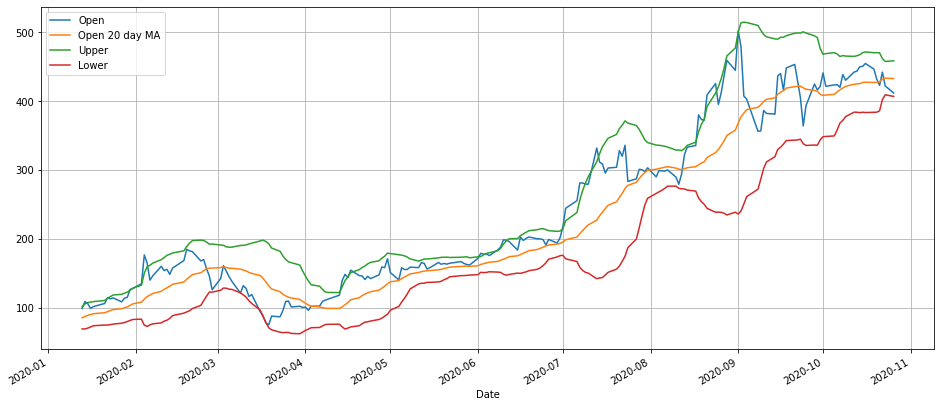

In [15]:
Tesla[['Open','Open 20 day MA','Upper','Lower']].tail(200).plot(figsize=(16,7)).grid(True)

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

Text(0.5, 0, 'Dates')

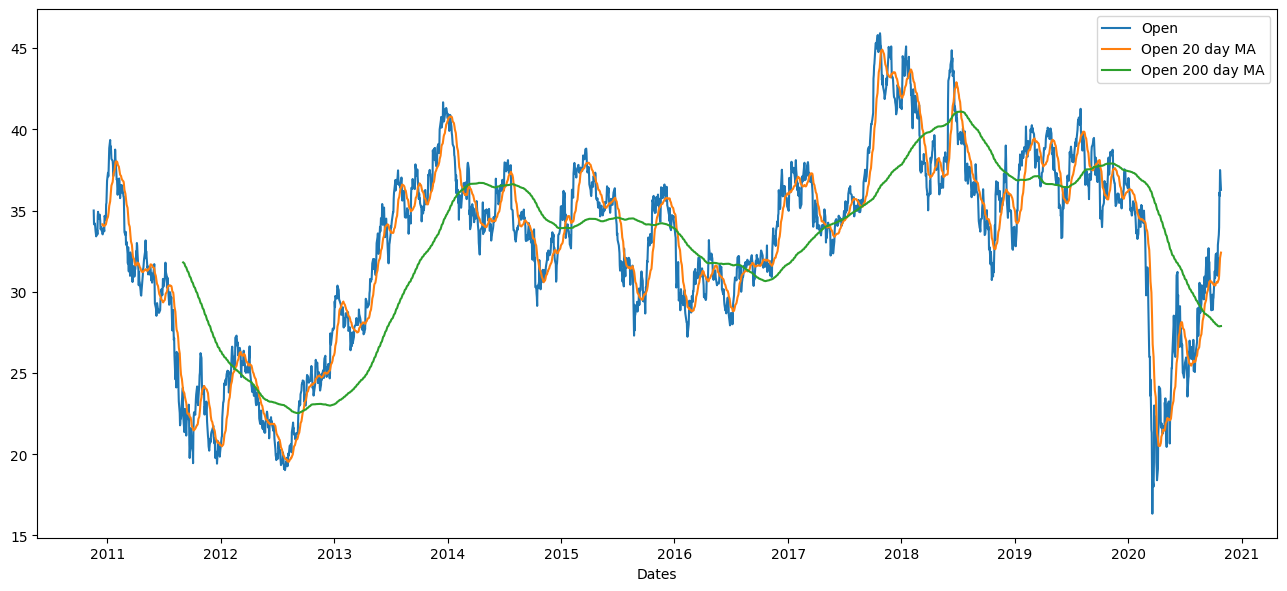

In [16]:
GM['Open 20 day MA'] = GM['Open'].rolling(20).mean()
GM['Open 200 day MA'] = GM['Open'].rolling(200).mean()
fig,ax = plt.subplots(figsize=(16,7),dpi=100)
ax.plot(GM['Open'])
ax.plot(GM['Open 20 day MA'])
ax.plot(GM['Open 200 day MA'])
ax.legend(['Open','Open 20 day MA','Open 200 day MA'])
ax.set_xlabel('Dates')
# ax.set_xlim('2020','2021')

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
data = pd.DataFrame(list(zip(Tesla['Open'],Ford['Open'],GM['Open'])),columns = ['Tesla Open','Ford Open','GM Open'])

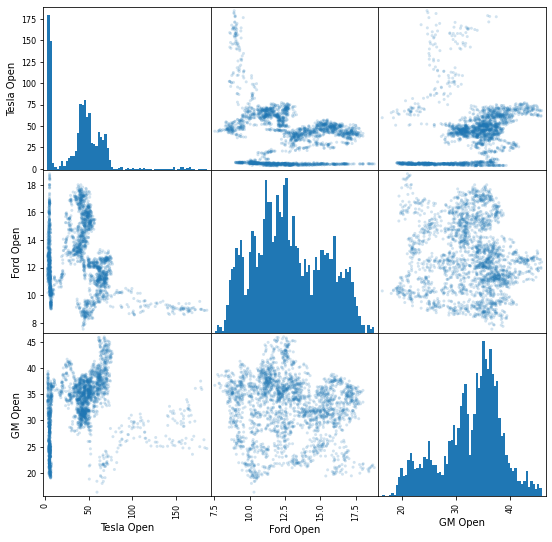

In [19]:
scatter_matrix(data, alpha=0.2, figsize=(9, 9),diagonal='hist',hist_kwds={'bins':70} );

In [20]:
fig1 = go.Figure(data=[go.Candlestick(x=Ford.index,
                open=Ford['Open'], high=Ford['High'],
                low=Ford['Low'], close=Ford['Close'])])
fig1.update_layout(yaxis=dict(range=[3,20]))
fig1.update_layout(title='Ford Candelstick',yaxis_title='Ford stock',shapes = [dict(
    x0='2020-02-01', x1='2020-05-01',y0=0,y1=1,yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-02-01', y=0.5, yref='paper',
        showarrow=False, xanchor='center', text='Decrease')])
fig1.show()

____
# Part 3: Basic Financial Analysis


## Daily Percentage Change

In [23]:
Tesla['Returns'] = (Tesla['Close']/Tesla['Close'].shift(periods=1))-1
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Open 20 day MA,Upper,Lower,Returns
Date,,,,,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,3.565597e+08,NaN,NaN,NaN,NaN
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,4.432553e+08,NaN,NaN,NaN,-0.002512
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,2.054700e+08,NaN,NaN,NaN,-0.078472
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,1.182154e+08,NaN,NaN,NaN,-0.125683
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,1.373380e+08,NaN,NaN,NaN,-0.160938


In [24]:
Ford['Returns'] = (Ford['Close']/Ford['Close'].shift(periods=1))-1
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,6.968545,6.189035e+08,NaN
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.429503,2.253231e+09,0.066148
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,7.707428,2.242791e+09,0.037409
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,7.904015,1.492111e+09,0.025506
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,7.924348,1.522503e+09,0.002573


In [25]:
GM['Returns'] = (GM['Close']/GM['Close'].shift(periods=1))-1
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Open 20 day MA,Open 200 day MA,Returns
Date,,,,,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.425232,1.599655e+10,NaN,NaN,NaN
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.479336,3.682804e+09,NaN,NaN,0.002047
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.340223,1.253451e+09,NaN,NaN,-0.005254
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.698719,1.058228e+09,NaN,NaN,-0.024355
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.876482,8.816347e+08,NaN,NaN,0.006917


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

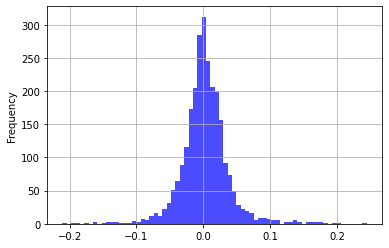

In [26]:
Tesla['Returns'].plot(kind='hist',bins=70,color='blue',alpha=0.7).grid(True)

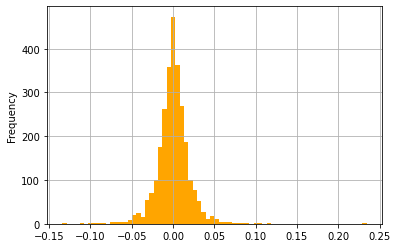

In [27]:
Ford['Returns'].plot(kind='hist',bins=70,color='orange').grid(True)

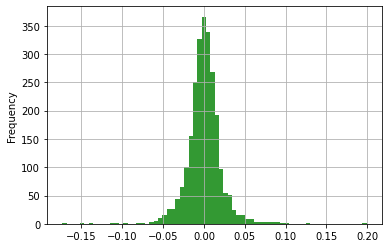

In [28]:
GM['Returns'].plot(kind='hist',bins=70,color='green',alpha=0.8).grid(True)

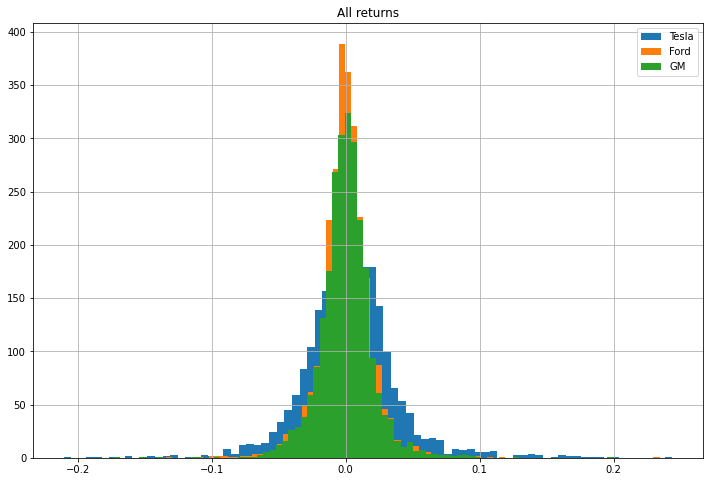

In [29]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(Tesla['Returns'],bins=80)
ax.hist(Ford['Returns'],bins=80)
ax.hist(GM['Returns'],bins=80)
ax.legend(['Tesla','Ford','GM'])
ax.set_title('All returns')
ax.autoscale_view()
ax.grid(True)

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

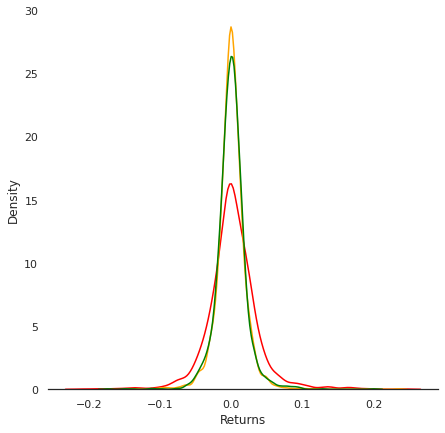

In [30]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(figsize=(7, 7))
sns.despine(left=True)
sns.kdeplot(Tesla['Returns'],  color="red")
sns.kdeplot(Ford['Returns'],  color="orange")
sns.kdeplot(GM['Returns'],  color="green")

** Try also creating some box plots comparing the returns. **

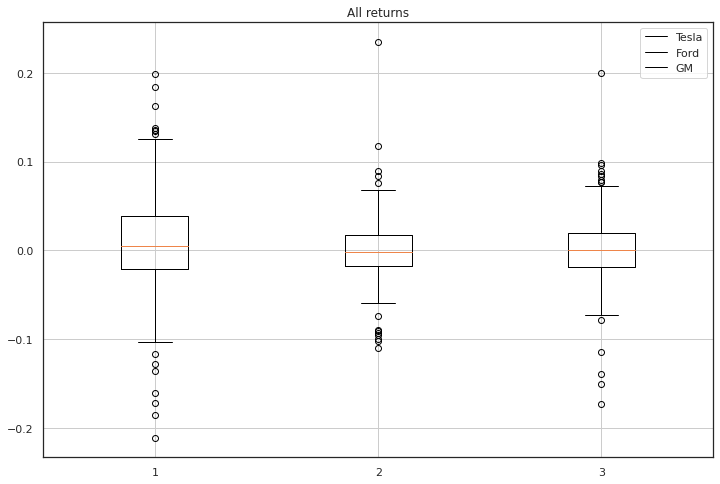

In [31]:
fig,ax = plt.subplots(figsize=(12,8))
ax.boxplot([Tesla['Returns'].tail(200),Ford['Returns'].tail(200),GM['Returns'].tail(200)])
ax.legend(['Tesla','Ford','GM'])
ax.set_title('All returns')
ax.autoscale_view()
ax.grid(True)

## Comparing Daily Returns between Stocks

In [32]:
data_returns= pd.DataFrame(list(zip(Tesla['Returns'],Ford['Returns'],GM['Returns']))
               ,columns = ['Tesla Returns','Ford Returns','GM Returns'])
data_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tesla Returns  2500 non-null   float64
 1   Ford Returns   2500 non-null   float64
 2   GM Returns     2500 non-null   float64
dtypes: float64(3)
memory usage: 58.7 KB


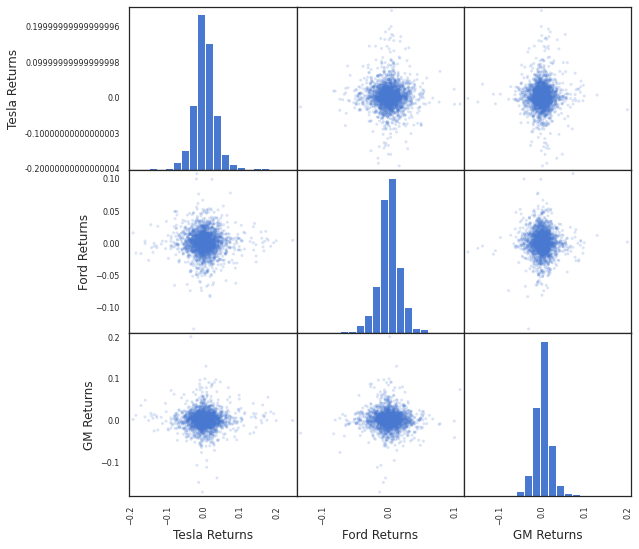

In [33]:
scatter_matrix(data_returns, alpha=0.2, figsize=(9, 9),diagonal='hist',hist_kwds={'bins':20} );

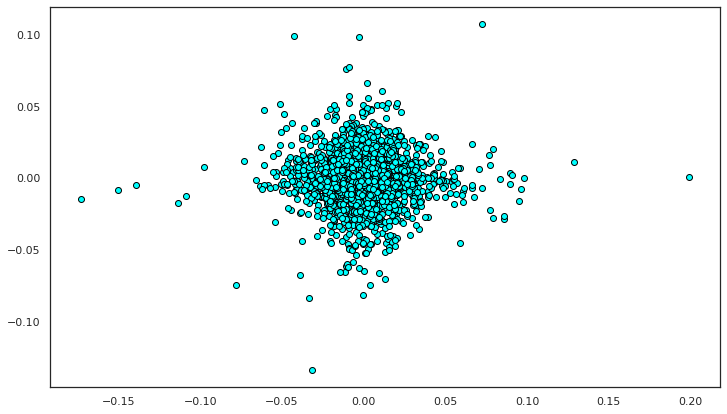

In [34]:
fig2,ax2  = plt.subplots(figsize=(12,7))
ax2.scatter(x=GM['Returns'].iloc[1:2500],y=Ford['Returns'].iloc[1:2500],c='cyan',edgecolors='black')

____
## Cumulative Daily Returns

In [35]:
Tesla['Daily']=Tesla['Close'].shift(periods=1)

In [36]:
Tesla['Daily Returns'] = (Tesla['Close']/Tesla['Daily'])-1

In [37]:
Tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Open 20 day MA,Upper,Lower,Returns,Daily,Daily Returns
Date,,,,,,,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,3.565597e+08,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,4.432553e+08,NaN,NaN,NaN,-0.002512,4.778,-0.002512
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,2.054700e+08,NaN,NaN,NaN,-0.078472,4.766,-0.078472
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,1.182154e+08,NaN,NaN,NaN,-0.125683,4.392,-0.125683
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,1.373380e+08,NaN,NaN,NaN,-0.160938,3.840,-0.160938
2010-07-07,3.326,2.996,3.280,3.160,34608500.0,3.160,1.135159e+08,NaN,NaN,NaN,-0.019243,3.222,-0.019243
2010-07-08,3.504,3.114,3.228,3.492,38557000.0,3.492,1.244620e+08,NaN,NaN,NaN,0.105063,3.160,0.105063
2010-07-09,3.580,3.310,3.516,3.480,20253000.0,3.480,7.120955e+07,NaN,NaN,NaN,-0.003436,3.492,-0.003436
2010-07-12,3.614,3.400,3.590,3.410,11012500.0,3.410,3.953487e+07,NaN,NaN,NaN,-0.020115,3.480,-0.020115


In [38]:
Tesla['daily_cumulative_return'] = ( 1 + Tesla['Returns'] ).cumprod()
Ford['daily_cumulative_return'] = ( 1 + Ford['Returns'] ).cumprod()
GM['daily_cumulative_return'] = ( 1 + GM['Returns'] ).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

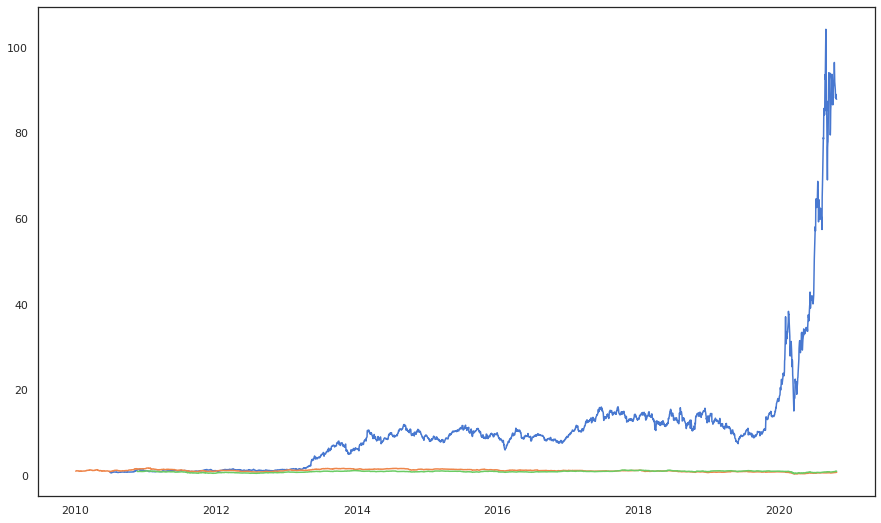

In [39]:
fig3,ax3 = plt.subplots(figsize=(15,9))
ax3.plot(Tesla['daily_cumulative_return'])
ax3.plot(Ford['daily_cumulative_return'])
ax3.plot(GM['daily_cumulative_return'])
ax.legend(['Tesla','Ford','GM'])
ax.autoscale_view()